<a href="https://colab.research.google.com/github/Spencer166/Capstone/blob/main/Step_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay

In [2]:
# Path to the dataset
file_path = "/content/drive/MyDrive/loan_dataset_20000.csv"

# Load into DataFrame
df = pd.read_csv(file_path)

# Display first few rows
df.head()

,age,gender,marital_status,education_level,annual_income,monthly_income,employment_status,debt_to_income_ratio,credit_score,loan_amount,...,loan_term,installment,grade_subgrade,num_of_open_accounts,total_credit_limit,current_balance,delinquency_history,public_records,num_of_delinquencies,loan_paid_back
0,59,Male,Married,Master's,24240.19,2020.02,Employed,0.074,743,17173.72,...,36,581.88,B5,7,40833.47,24302.07,1,0,1,1
1,72,Female,Married,Bachelor's,20172.98,1681.08,Employed,0.219,531,22663.89,...,60,573.17,F1,5,27968.01,10803.01,1,0,3,1
2,49,Female,Single,High School,26181.80,2181.82,Employed,0.234,779,3631.36,...,60,76.32,B4,2,15502.25,4505.44,0,0,0,1
3,35,Female,Single,High School,11873.84,989.49,Employed,0.264,809,14939.23,...,36,468.07,A5,7,18157.79,5525.63,4,0,5,1
4,63,Other,Single,Other,25326.44,2110.54,Employed,0.260,663,16551.71,...,60,395.50,D5,1,17467.56,3593.91,2,0,2,1


In [6]:
#Define Target
target = "loan_paid_back"

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

# One-Hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

#Split into features and Target
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y)


#Scale numeric features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
#train logistic regression model
model = LogisticRegression(random_state=1,max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

Accuracy: 0.8915
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.59      0.68       800
           1       0.90      0.97      0.93      3200

    accuracy                           0.89      4000
   macro avg       0.86      0.78      0.81      4000
weighted avg       0.89      0.89      0.88      4000



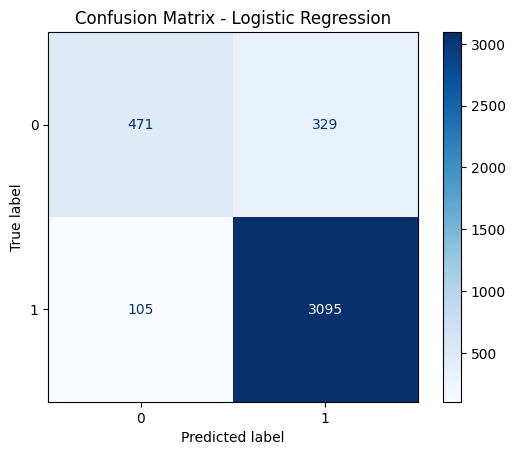

ROC AUC Score: 0.8941292968750001


In [17]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Calculate ROC AUC score
roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc_score)

In [19]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

Accuracy: 0.902
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.53      0.69       800
           1       0.90      0.99      0.94      3200

    accuracy                           0.90      4000
   macro avg       0.93      0.76      0.81      4000
weighted avg       0.91      0.90      0.89      4000



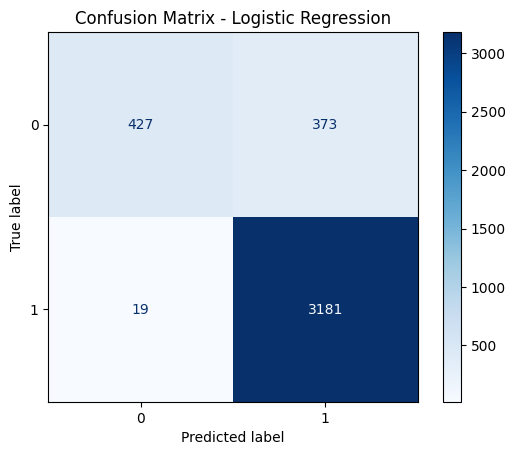

ROC AUC Score: 0.8941292968750001


In [20]:
rf_y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))


# Generate a confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Calculate ROC AUC score
roc_auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_auc_score)